In [ ]:
# 1.Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# 2. Simulating Proteomics Data
np.random.seed(42)
data = np.random.rand(100, 6) * 1e6

In [ ]:
# 3. Introduce Missing Values
mask = np.random.choice([1, 0], data.shape, p=[0.1, 0.9])
data[mask == 1] = np.nan

In [ ]:
# 4. Convert to DataFrame
df = pd.DataFrame(data, columns=[f"Sample_{i}" for i in range(1, 7)])
print("Raw Data:")
print(df.head())


Raw Data:
        Sample_1       Sample_2       Sample_3       Sample_4       Sample_5  \
0  374540.118847  950714.306410  731993.941811            NaN  156018.640442   
1   58083.612168  866176.145775  601115.011743  708072.577796            NaN   
2  832442.640800            NaN  181824.967207  183404.509853            NaN   
3  431945.018642  291229.140198  611852.894722  139493.860652  292144.648535   
4  456069.984217  785175.961393  199673.782158  514234.438414            NaN   

        Sample_6  
0  155994.520336  
1  969909.852162  
2  524756.431632  
3  366361.843294  
4   46450.412720  


In [ ]:
# 5. Impute Missing Values with KNN
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [ ]:
# 6. Log2 Transformation
df_log = np.log2(df_imputed + 1)


In [ ]:
# 7. Median Normalization
df_norm = df_log - df_log.median()

In [ ]:
# 8. Scaling Before PCA
scaler = StandardScaler()
scaled = scaler.fit_transform(df_norm)


In [ ]:
# 9. Apply PCA (Noise Reduction)
pca = PCA(n_components=2)
pc = pca.fit_transform(scaled)


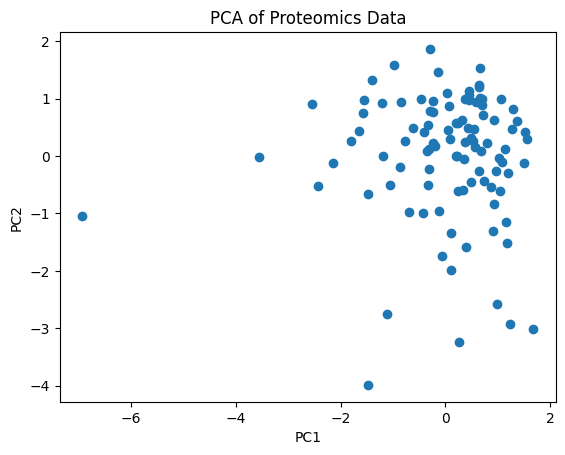

In [ ]:
# 10. Plot PCA
plt.scatter(pc[:, 0], pc[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Proteomics Data")
plt.show()


### Interpretation of the PCA Plot:

1.  **What is PCA?**
    *   Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform a large set of variables into a smaller one that still contains most of the information in the large set. It aims to identify the most important underlying patterns or components in the data.

2.  **Axes (PC1 and PC2):**
    *   `PC1` (Principal Component 1) and `PC2` (Principal Component 2) are the new, orthogonal (uncorrelated) dimensions created by PCA.
    *   `PC1` captures the largest amount of variance in the original data, meaning it represents the direction along which the data points vary the most.
    *   `PC2` captures the second largest amount of variance, perpendicular to `PC1`.

3.  **Points on the Plot:**
    *   Each point on the scatter plot represents one of your 100 proteomics samples.
    *   The position of each point is determined by its score along `PC1` (x-axis) and `PC2` (y-axis).

4.  **What the Scattering of Points Tells Us:**
    *   **Variability:** The spread of the points across the plot indicates the overall variability and diversity among your proteomics samples. A wider spread suggests more distinct differences between samples.
    *   **Similarity/Dissimilarity:** Samples that are located close to each other on the plot are considered similar in terms of their proteomic profiles (after imputation, log2 transformation, normalization, and scaling).
    *   **Potential Clusters:** If there were distinct groups or clusters of points, it could suggest underlying biological subgroups or different experimental conditions among your samples. In this particular plot, the points appear somewhat scattered without very clear, tight clusters, which might indicate a continuous spectrum of variation rather than discrete groups, or that more principal components might be needed to reveal clearer structures.

5.  **Context of Proteomics Data and Noise Reduction:**
    *   In proteomics, data often contains high dimensionality and noise. By reducing the dimensions to `PC1` and `PC2`, we focus on the most significant sources of variation while effectively reducing the impact of noise and less informative variations.
    *   This plot helps visualize the main patterns in your processed proteomics data, making it easier to identify global trends or outliers that might not be apparent in the raw, high-dimensional data.

In summary, the PCA plot provides a simplified 2D representation of your complex proteomics data, highlighting the main sources of variation among your samples and allowing for a visual assessment of data structure and potential groupings.

### Final Conclusion: Journey Through Proteomics Data Analysis

We embarked on a comprehensive proteomics data analysis pipeline, starting from simulated raw data and progressing through various preprocessing and dimensionality reduction steps. Here's a recap of our journey:

1.  **Import Required Libraries:** We began by importing essential libraries such as `numpy` for numerical operations, `pandas` for data manipulation, `KNNImputer` for handling missing values, `StandardScaler` for data scaling, `PCA` for dimensionality reduction, and `matplotlib.pyplot` for visualization.

2.  **Simulating Proteomics Data:** To mimic a real-world scenario, we generated a synthetic proteomics dataset comprising 100 samples and 6 features (e.g., proteins or peptides) with random values, scaled to simulate typical proteomics intensity ranges.

3.  **Introduce Missing Values:** A common challenge in proteomics is missing data. We deliberately introduced a 10% rate of missing values (`NaN`) into our simulated dataset to make the analysis more realistic.

4.  **Convert to DataFrame:** The numpy array was then converted into a pandas DataFrame, which is a more suitable structure for data manipulation and analysis, with descriptive column names like 'Sample_1' to 'Sample_6'.

5.  **Impute Missing Values with KNN:** We addressed the missing data using `KNNImputer` with `n_neighbors=3`. This method estimates missing values based on the values of the 3 nearest neighbors, providing a robust way to fill in gaps in the dataset.

6.  **Log2 Transformation:** Proteomics data often follows a non-normal distribution. To stabilize variance and make the data more suitable for downstream statistical analyses, we applied a `log2` transformation to the imputed data.

7.  **Median Normalization:** To account for technical variations between samples and ensure that differences observed are biological rather than experimental, we performed median normalization. This step aligns the central tendency of each sample's distribution.

8.  **Scaling Before PCA:** Principal Component Analysis (PCA) is sensitive to the scale of features. Therefore, we used `StandardScaler` to transform the normalized data, ensuring that each feature contributes equally to the PCA, regardless of its original magnitude.

9.  **Apply PCA (Noise Reduction):** The core of our dimensionality reduction was applying PCA. We reduced the high-dimensional data (6 features) to two principal components (`n_components=2`), effectively capturing the most significant variance in the dataset while reducing noise.

10. **Plot PCA:** Finally, we visualized the results of the PCA using a scatter plot. This plot displayed each sample as a point in a 2D space defined by PC1 and PC2, allowing for a visual assessment of data structure, variability, and potential clustering.

11. **Interpretation of the PCA Plot:** We then provided a detailed explanation of the PCA plot, elucidating what PCA is, the meaning of PC1 and PC2, what the points represent, and how the scattering of points provides insights into sample similarity, dissimilarity, and potential biological groupings within the proteomics data.